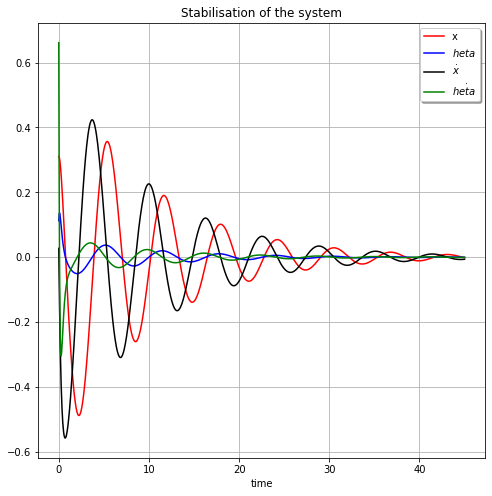

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.integrate import odeint

g = 9.81
M = 0.2
m = 1
l = 0.1

eig_1 = [-0.25, -0.5, -1, -2]
eig_2 = [-1.1, -1.2, -1.3, -1.4]
eig_3 = [-0.1 + 1j, -0.1 - 1j, -6 + 1j, -6 - 1j]

A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, g*m/M, 0, 0], [0, g*(M+m)/l/M, 0, 0]])
B = np.array([0, 0, 1/M, 1/l/M]).reshape(-1, 1)
res_pole = sig.place_poles(A, B, eig_3)
K = res_pole.gain_matrix

# visualization
def control(x, t):
    return np.dot(A - np.dot(B, K), x)

time = np.linspace(0, 45, 1000)   
x0 = (np.random.random(4)) 
res = odeint(control, x0, time).T

fig = plt.figure(figsize=(8, 8))
plt.title("Stabilisation of the system")
plt.xlabel("time")
plt.plot(time, res[0], "r-", label="x")
plt.plot(time, res[1], "b-", label="$\theta$")
plt.plot(time, res[2], "k-", label="$\dot{x}$")
plt.plot(time, res[3], "g-", label="$\dot{\theta}$")
plt.grid()
plt.legend(shadow=True)
plt.show()

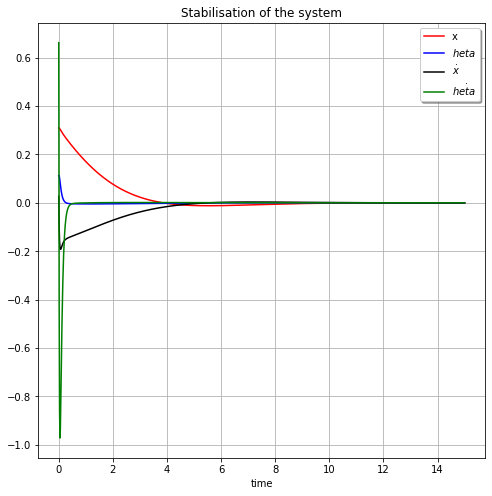

In [2]:
import scipy.linalg as lin
#3
M = 0.2
m = 1
l = 0.1
#2
# M = 0.02
# m = 0.01
# l = 0.5

#1
# M = 0.01
# m = 0.001
# l = 0.1

# A, B - the same

A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, g*m/M, 0, 0], [0, g*(M+m)/l/M, 0, 0]])
B = np.array([0, 0, 1/M, 1/l/M]).reshape(-1, 1)

# Q, R - random, but appropriate
Q = np.array([[1, 0, 0, 0], 
              [0, 1, 0, 0], 
              [0, 0, 1, 0], 
              [0, 0, 0, 1]])
# R = np.array([-0.4]) #1
R = np.array([4]) #1

S = lin.solve_continuous_are(A, B, Q, R)

k = np.array(1/R[0]).dot(B.T).dot(S)

def simulator(x, t):
    return (A - np.dot(B, k)).dot(x)

time = np.linspace(0, 15, 1000)  
res = odeint(simulator, x0, time).T

fig = plt.figure(figsize=(8, 8))
plt.title("Stabilisation of the system")
plt.xlabel("time")
plt.plot(time, res[0], "r-", label="x")
plt.plot(time, res[1], "b-", label="$\theta$")
plt.plot(time, res[2], "k-", label="$\dot{x}$")
plt.plot(time, res[3], "g-", label="$\dot{\theta}$")
plt.grid()
plt.legend(shadow=True)
plt.show()